## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

In this worksheet the greenhouse gas emission data from the set owid-co2-data.csv from Our World in Data is used to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

The purpose of the code below is to put a name to the large file of code. This will make is easier in the following comands to refer, organize and graph the greenhouse gas emissions data. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

The data shown above was provided from the set owid-co2-data.csv from Our World in Data. The label 'df' is set equal to the raw data set and allows us to refer to this raw data in a more simplistic form 

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [3]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

Removing the rows corresponding to the non-countries allows us to get rid of the data in the country section that in not a country. This allows the data from being innacuratly depicted. 

In [4]:
df_population = df.loc[df['country'].isin(non_countries) == False]

The label 'df population' allows us to rename the data set that has removed the data points that are not realated to a country. The df.loc comand makes it possible to select certain data from a data frame. In this line of code we are stating that in the lable 'df_population' should exclude all the countries in the 'non-countries' lable. That is why we set the 'non-countries' label equal to false.   

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

Showing the head of a data set shows the first five rows of a data frame. 

In [5]:
df_population.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


The 'df_populations' is the data set that was created to weed out all the non countries in the countries coulmn. The head that is shown is the first five rows of the data frame, which in this case the only filled values are the country, year of which the data was collected, iso_code and population. For the other colnms, we observe the output of 'NaN'. NaN stands for 'not a number', this means that the data for these colmns can be interpreted as a value that is undefined or unrepresentable. 

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

The info command gives us a concise view of the summary of data set. 

In [6]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

The info command of the 'df_population' data set allows us to view the summary of the data set. Like the number of colunms, the colunm lables,if there is there is any NaN (not a number) data, and the data type. The data types shown are float64, object and int64, this refers to how the data is stored. The data type float64 is float values represented as 64-bit double-precision values, where int64 us a 64 bit integer. The 64 refers to memory allocated to store data in each cell. 

1..  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?

Yes, The different data types are called float64, int64 and object in this data frame. The columns for year (data type 'int64') is labled as a string but should be coded for a number. 

2.  Do any of the columns have missing (null) values? 

Yes, there are columns that have null values. Any values that have less than 39638 entires are missing values. There are columns with null values because there were years were data was no recorded. 


##### $\rightarrow$ What years are present in the data set?

The purpose of this code is to show the earliest and most recent year where data was collected. 

In [7]:
df_population.agg(['min', 'max'])

<ipython-input-7-14de70fa3770>:1: FutureWarning: ['iso_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_population.agg(['min', 'max'])


,country,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
min,Afghanistan,1750,2.150000e+02,4.998000e+07,0.000,0.000,0.000,-543.453,-100.000,-187.032,...,0.0,0.00,0.0,-5.401,0.0,0.0,-186.55,0.01,-1526.506,-98.279
max,Zimbabwe,2021,1.425894e+09,1.815162e+13,858.233,2.574,11472.368,911.903,102318.508,11799.967,...,100.0,58.57,100.0,54.058,100.0,100.0,12055.41,12705.09,659.548,607.521


The 'df_population' is the name that we gave the data set that we extracted all the improper countries from and from that data set we used the 'agg' command to apply the minumim and maximum function. From this we are interested in looking at the minimum and maximum years.
The years of the data frame span between 1750 and 2021. 

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



The purpose of this line of code is to sort the data base by countries with the highest CO2 emmissions in 2020. 

In [8]:
df_population[df_population['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


We used our 'df_population' data frame and set the year that we were focusing on to 2020. After that we used the 'sort.values' function to sort values to according to the countries CO2 values. We set the list to ascending equal to false. This means the sort function will sort the data in descending order (from highest to lowest). This is how we got the countries with the largest CO2 emssions in the year 2020 to appear at the top of the list. 

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

The purpose of this line of code is to show the total CO2 emissions from the data frame on a histagram. The density scale on a histogram is a way to smooth the histogram. Using a density histogram means that if we sum all the area of the bars together it would be equal to one. 

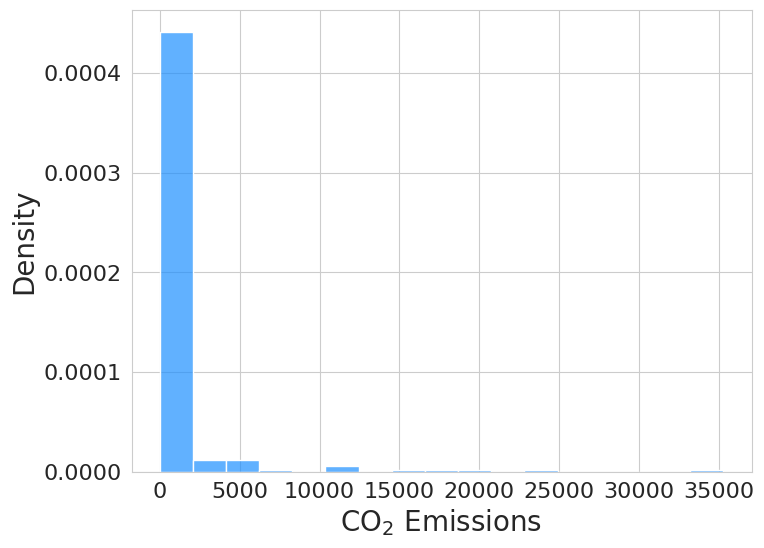

In [9]:

plt.figure(figsize = (8,6))
sns.histplot(data = df[df['year'] == 2020], x = 'co2', bins = 17 , color = 'dodgerblue', alpha = 0.7, stat = 'density')
plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO$_2$ Emissions',fontsize = 20)
plt.tick_params(labelsize = 16);

In this histogram, we used to code to specify the size of the figure. The sns.histplot uses the data, from the predetermined data frame in 'df' and uses the data from the year 2020. The color of the histogram bars is determined by the code 'dodgerblue' and the x-axis is CO2 data from the 'df' data frame. We also used to the plt.ylable and plt.xlable to name the x and y axises. This density scaled boxplot shows that a high majority of countries have CO2 emission levels under 5000, but there are a small portion of countires with much higher emissions.  

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

The purpose of this code is to show the CO2 from the data frame in the year 2020, in a boxplot. This will allow for observation of outliers if any lie within the data frame. The strip plot will allow for extra dimension on the visual, which is better for accurate interpretation. 

<ipython-input-10-2ad8d5985db3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = df_population[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize=0)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


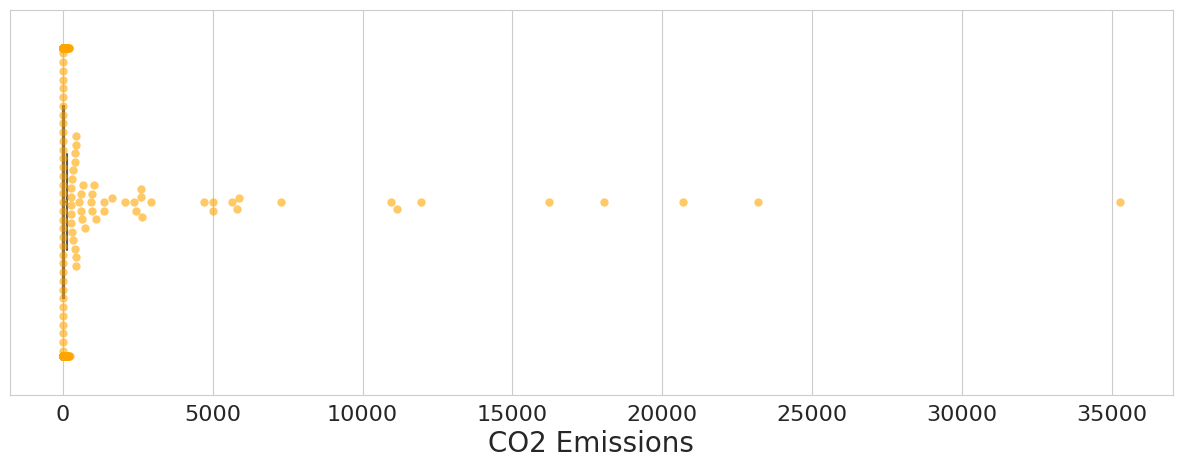

In [10]:
plt.figure(figsize = (15,5))

sns.boxplot(data = df_population[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize=0)

sns.swarmplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

plt.xlabel('CO2 Emissions',fontsize = 20)

plt.tick_params(labelsize = 16);

The code above determined the size of the figure shown above. The box plot was coded by the statement sns.boxplot, it used the data from the predetermined data frame labled 'df_population' to formulate the boxplot. The data to create the visual was coded to only pull data from the year 2020. The code sns.swarm creates the swarm plot that is seen in orange on top of the blue box plot. From the swarm plot on top of the box plot we can see that there is a heavy concentration of countries with CO2 emissions under 5,000, but there countries that have large amounts of CO2 emissions which are causing outliers. 

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

The top 10 emitters in 2020 are shown as outliers in the distribution. The two largest ourliers are U.S and China. 

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

This codes purpose is to examine if the data frame we have been working with has any gaps in the data for the CO2 emission values for the top 10 emitters in 2020, through out the years 1971 to 2020. 

In [11]:
df_top_ten = df_population[df_population['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)
df_ten_emissions = df_population[df_population['country'].isin(df_top_ten['country'])]
df_ten_emissions.head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8819,China,1850,CHN,409821554.0,3.534960e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.629,NaN,NaN,NaN,NaN,NaN,NaN
8820,China,1851,CHN,407685621.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.232,NaN,NaN,NaN,NaN,NaN,NaN
8821,China,1852,CHN,404840117.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.733,NaN,NaN,NaN,NaN,NaN,NaN
8822,China,1853,CHN,401291154.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.473,NaN,NaN,NaN,NaN,NaN,NaN
8823,China,1854,CHN,397773301.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.036,NaN,NaN,NaN,NaN,NaN,NaN
8824,China,1855,CHN,394286284.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.834,NaN,NaN,NaN,NaN,NaN,NaN
8825,China,1856,CHN,390829834.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.573,NaN,NaN,NaN,NaN,NaN,NaN
8826,China,1857,CHN,387403681.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.255,NaN,NaN,NaN,NaN,NaN,NaN
8827,China,1858,CHN,384007562.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.913,NaN,NaN,NaN,NaN,NaN,NaN
8828,China,1859,CHN,380918916.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.591,NaN,NaN,NaN,NaN,NaN,NaN


Remaning the data set of the top ten emitters to 'df_ten_emissions' allows for manipulation of this specific data within the dataframe.Examining the head of this data set, show initally some NaN values for the year colunm. This means that there gaps in the data for the CO2 emission values for the top 10 emitters in 2020, through out the years 1971 to 2020. 

In [12]:
df_ten_emissions.nunique()

country                       10
year                         230
iso_code                      10
population                  1824
gdp                         1201
                            ... 
share_global_other_co2       250
total_ghg                    300
total_ghg_excluding_lucf     299
trade_co2                    310
trade_co2_share              309
Length: 74, dtype: int64

Next, I used the unique value code to show the unique values of the columns of the data frame. This allows us to look at the complied number of data points in a specfic coulmn. If there were no gaps in the data for the CO2 emission values for the top 10 emitters in 2020, through out the years 1971 to 2020; the vaulue for the year coulmn would read '490'. 

In [13]:
df_ten_emissions.isna()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8819,False,False,False,False,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8820,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8821,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8822,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8823,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44220,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


Looking at the data in the top ten emissions using the command insa() allows us to identify missing values with in the data frame. The 'false' values reference a cell contains and n/a error, this is not the case for the 'true' values. 

##### Solution

No, except the values the one with non-contries. Because 'the world' would have been the top ten emitters, but this value was removed. 

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

The purpose of this code is to plot a line graph of CO2 emissions from 1971 to 2020 for the top 10 emitters in 2020. This will help us get a better understanding of the trends of each of the specific countries. 

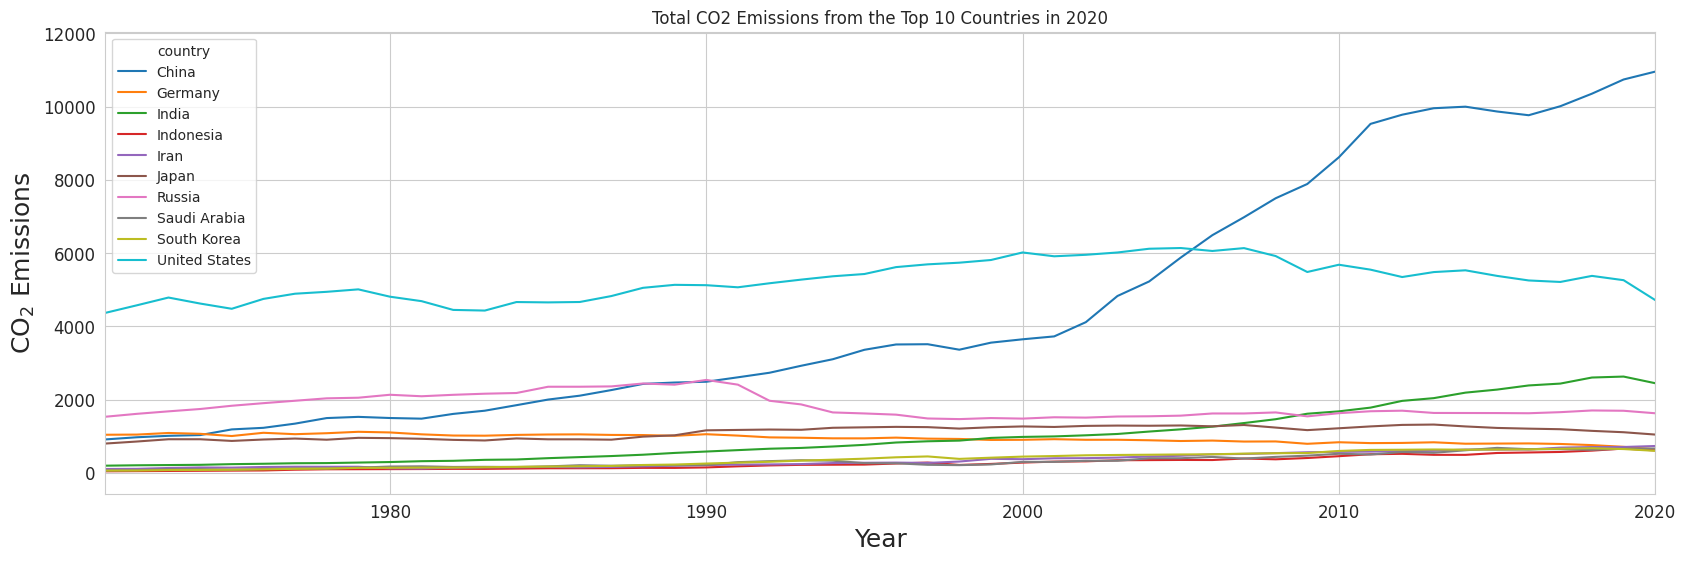

In [47]:
plt.figure(figsize = (20,6))

sns.lineplot(data=df[df['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], x='year', y='co2', hue='country')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('CO$_2$ Emissions', fontsize = 18); 
plt.title('Total CO2 Emissions from the Top 10 Countries in 2020') 
plt.xlim(1971,2020)
plt.tick_params(labelsize = 12)                           

When coding the sns.lineplot, we used the data set named 'df' but extracted the values from the the specific countries with the top ten emissions. The names of these top ten countries was obtained earlier in the lab where we found the names of the top ten emitters. The x and y axis is labled and the time frame was set to the year 1971 to 2020. The graph produced shows that over half of the countries in the top ten emissions have emissions under the values of 2000, through out the years of 1971 to 2020. China, which is the number one emittor shows an unprecedented increase in CO2 emissions since 2000. Where the second largest emittor, the United States has been decreasing emissions since about 2005 but is still the second largest emittor in 2020. 

##### Solution

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

The purpose of this code is to show an 11th line on the line graph. This additional line shows the average emissions data all of the countries. 

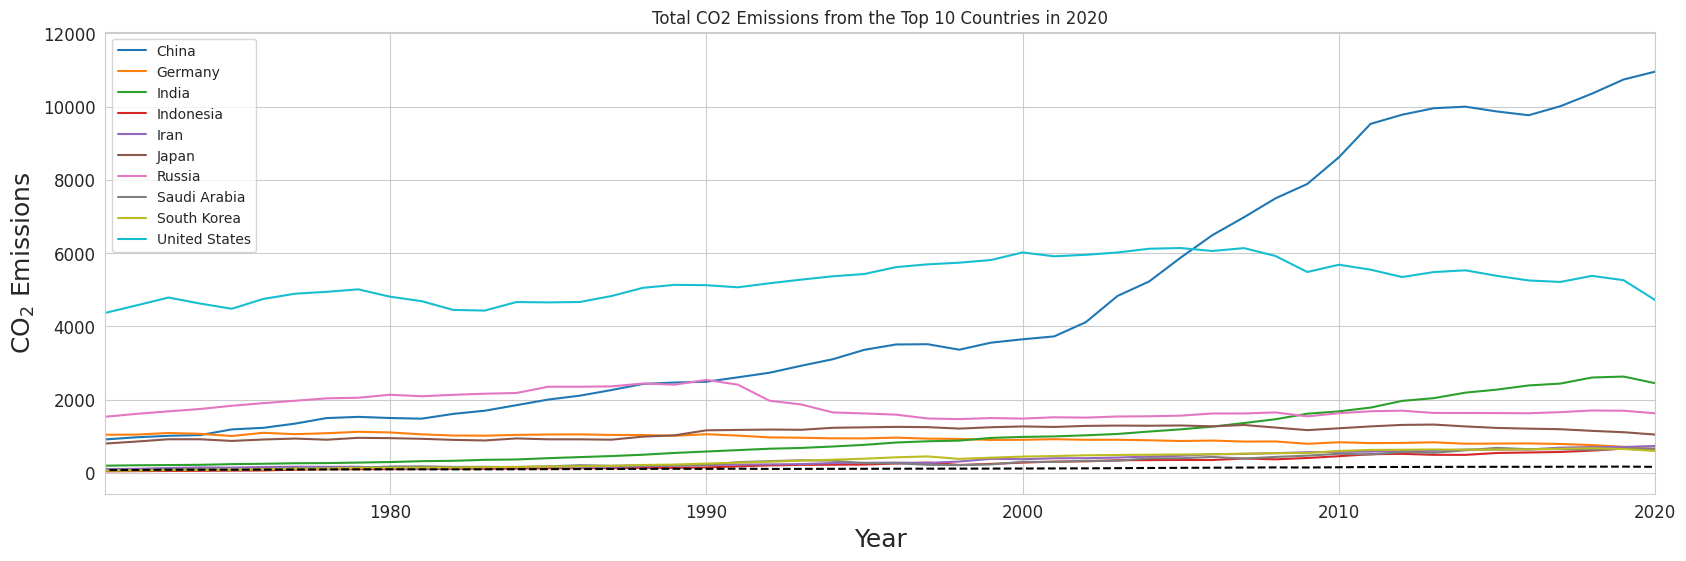

In [54]:
plt.figure(figsize = (20,6))

sns.lineplot(data=df[df['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], x='year', y='co2', hue='country')
sns.lineplot(data = df_population[['year','co2']].groupby('year').mean(), x='year', y='co2', color='k', linestyle='--')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('CO$_2$ Emissions', fontsize = 18); 
plt.title('Total CO2 Emissions from the Top 10 Countries in 2020') 
plt.xlim(1971,2020)
plt.tick_params(labelsize = 12)   

To obatain this graph, everything from the previous graph was kept the same except the 'df_population' data was group and averaged to create the doted line on the graph. This dotted line shows a slight increase in emissions over the years 1971 to 2020, but the trend almost could be mistaken for linear - the increase is so slight. An agrument could be made that the only data points in the data frame making the average CO2 emissions line show a slight increase since the year 2000 is China's large increase in output of emission. This additional line shows the impact of a large outlier and the influence it can have on global emission trends. 

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

The purpose of this code is to show the data from the previous line graphs on a log scale, with hopes of showing an additional view of the data. The log scale view allows for a better understanding of the points of exponential growth. 

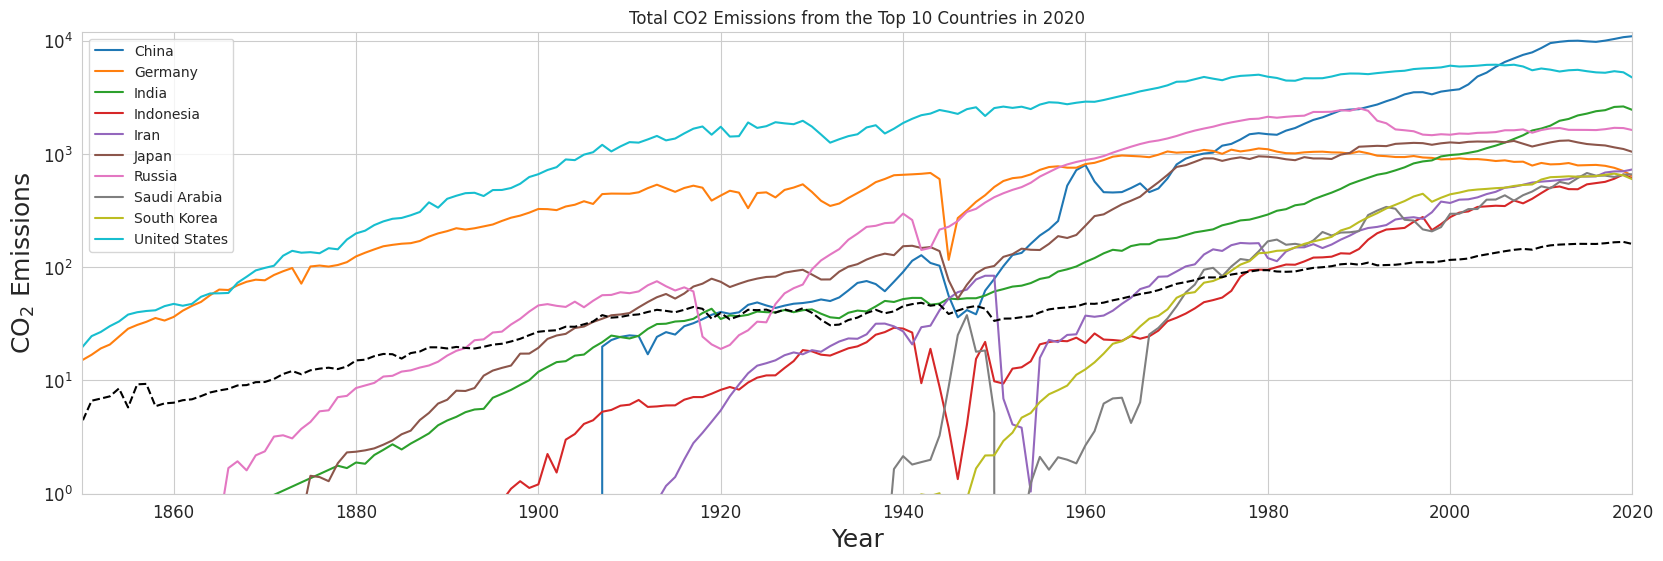

In [55]:
plt.figure(figsize = (20,6))

sns.lineplot(data=df[df['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], x='year', y='co2', hue='country')
sns.lineplot(data = df_population[['year','co2']].groupby('year').mean(), x='year', y='co2', color='k', linestyle='--')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('CO$_2$ Emissions', fontsize = 18); 
plt.title('Total CO2 Emissions from the Top 10 Countries in 2020') 

plt.tick_params(labelsize = 12) 
plt.ylim(1,12000)
plt.xlim(1850,2020)
plt.yscale('log')   

##### Solution

Everything from the code of the last line graph was kept the same the additional function of 'plt.yscale('log') was added to turn the old line graph into a log scaled graph. This allows for a better representation of all the countries trends instead of only being able to see the trends from the US and China. From the additional log scale view given, there still seems to be an increasing trend of CO2 over the years from the majority of countries and therefore the mean line as well. 

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

In the last 50 years the trends of these countries shows a postive correlation. Hopfully, for the sake of planetary health and human health there is a sharp decrease in CO2 emissions in the next decade.  